<a href="https://colab.research.google.com/github/anyuanay/INFO371/blob/main/INFO371_Week2_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 371: Data Mining Applications

## Week 2: KNN and Scikit-Learn
### Prof. Y. An, PhD
### College of Computing and Informatics, Drexel University

## Introduction


The package `sklearn.neighbors` provides functionality for unsupervised and supervised neighbors-based learning methods. Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits or satellite image scenes. Being a non-parametric and instance-based method, it is often successful in classification situations where the decision boundary is very irregular.

scikit-learn implements two different nearest neighbors classifiers: KNeighborsClassifier implements learning based on the k nearest neighbors of each query point, where k is an integer value specified by the user. RadiusNeighborsClassifier implements learning based on the number of neighbors within a fixed radius r of each training point, where r is a floating-point value specified by the user.

The k-neighbors classification in KNeighborsClassifier is the more commonly used of the two techniques. The optimal choice of the value k is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns uniform weights to each neighbor. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied which is used to compute the weights.

## A Smaller Iris Flower Data Set
We extracted a smaller set of the Iris Flower Data Set with only two features and 40 instances. the Species column is kept for flower labels.

The columns in this dataset are:

* SepalLength
* SepalWidth
* Species

### Load the data

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

%matplotlib inline
```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
files.upload()

Saving iris_smaller.csv to iris_smaller.csv


{'iris_smaller.csv': b'sepal_length,sepal_width,species\n5.4,3.4,setosa\n5.1,3.7,setosa\n4.6,3.6,setosa\n5.1,3.3,setosa\n4.8,3.4,setosa\n5.0,3.0,setosa\n5.0,3.4,setosa\n5.2,3.5,setosa\n5.2,3.4,setosa\n4.7,3.2,setosa\n4.8,3.1,setosa\n5.4,3.4,setosa\n5.2,4.1,setosa\n5.5,4.2,setosa\n4.9,3.1,setosa\n5.0,3.2,setosa\n5.5,3.5,setosa\n4.9,3.1,setosa\n4.4,3.0,setosa\n5.1,3.4,setosa\n7.0,3.2,versicolor\n6.4,3.2,versicolor\n6.9,3.1,versicolor\n5.5,2.3,versicolor\n6.5,2.8,versicolor\n5.7,2.8,versicolor\n6.3,3.3,versicolor\n4.9,2.4,versicolor\n6.6,2.9,versicolor\n5.2,2.7,versicolor\n5.0,2.0,versicolor\n5.9,3.0,versicolor\n6.0,2.2,versicolor\n6.1,2.9,versicolor\n5.6,2.9,versicolor\n6.7,3.1,versicolor\n5.6,3.0,versicolor\n5.8,2.7,versicolor\n6.2,2.2,versicolor\n5.6,2.5,versicolor\n'}

In [ ]:
df = pd.read_csv("iris_smaller.csv")
df.shape

(40, 3)

```
df.sample(5)
```

```
df.shape
```

In [ ]:
df.shape

(40, 3)

In [ ]:
df.sample(5)

,sepal_length,sepal_width,species
21,6.4,3.2,versicolor
32,6.0,2.2,versicolor
5,5.0,3.0,setosa
3,5.1,3.3,setosa
18,4.4,3.0,setosa


```
species = df.species.unique()
```

In [ ]:
species = df.species.unique()
species

array(['setosa', 'versicolor'], dtype=object)

### Conver the target label to numeric values
```
label_maps = {'setosa':0, 'versicolor':1}
label_maps
```

In [ ]:
label_maps = {'setosa':0, 'versicolor':1}
label_maps

{'setosa': 0, 'versicolor': 1}

```
df['Species'].replace(label_maps, inplace = True)
```

In [ ]:
y_train = df.species.map(label_maps)

In [ ]:
df.sample(5)

,sepal_length,sepal_width,species
13,5.5,4.2,0
3,5.1,3.3,0
30,5.0,2.0,1
1,5.1,3.7,0
39,5.6,2.5,1


### Extract training data
```
X_train = df.iloc[:, 0:-1]
```

In [ ]:
df.head()

,sepal_length,sepal_width,species
0,5.4,3.4,setosa
1,5.1,3.7,setosa
2,4.6,3.6,setosa
3,5.1,3.3,setosa
4,4.8,3.4,setosa


In [ ]:
X_train = df[['sepal_length', 'sepal_width']]

```
X_train.head()
```

In [ ]:
X_train.head()

,sepal_length,sepal_width
0,5.4,3.4
1,5.1,3.7
2,4.6,3.6
3,5.1,3.3
4,4.8,3.4


In [ ]:
y_train.sample(5)

1     0
35    1
26    1
31    1
10    0
Name: species, dtype: int64

### Explore the Data

```
y_train = df.species
```

In [ ]:
y_train = df.species

```
plt.figure(figsize = (15, 9))
pd.plotting.scatter_matrix(X_train, figsize = (15, 9), c = y_train, marker = 'o')
plt.grid()
```

<Figure size 1080x648 with 0 Axes>

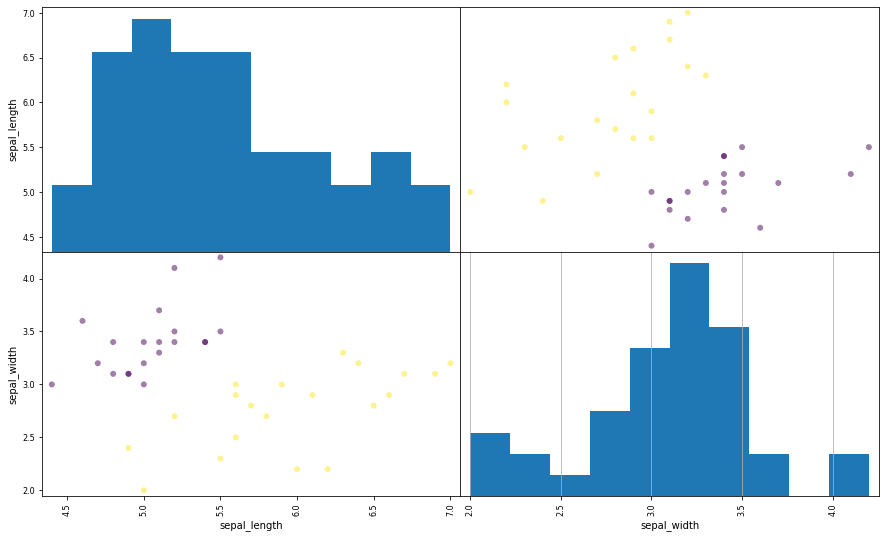

In [ ]:
plt.figure(figsize = (15, 9))
pd.plotting.scatter_matrix(X_train, figsize = (15, 9), c = y_train, marker = 'o')
plt.grid()

### Using KNN for Modeling and Prediction

```
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)
```

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.predict(X_train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_train, knn.predict(X_train))

1.0

### Evaluate
Given a set of labeled data and a predictive model, every data point lies in one of
four categories:
• True positive (tp): “This message is spam, and we correctly predicted spam.”
• False positive (fp) (Type 1 Error): “This message is not spam, but we predicted spam.”
• False negative (fn) (Type 2 Error): “This message is spam, but we predicted not
spam.”
• True negative (tn): “This message is not spam, and we correctly predicted not spam.”

We often represent these as counts in a confusion matrix:

|      |positive | negative |
|------|------|------|
|positive|tp |fp|
|negative|fn | tn|

$accuracy = \frac{tp + tn}{tp + fp+tn+fn}$

$precision = \frac{tp}{tp+fp}$

$recall = \frac{tp}{tp+fn}$

$F1\_Score = \frac{2}{\frac{1}{recall} + \frac{1}{precision}} = \frac{2tp}{2tp + fp + fn}$

In [ ]:
# import the metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
# evaluate the model accuracy on the training data
accuracy_score(y_train, y_pred)

1.0

## Rescaling
Many techniques are sensitive to the scale of your data. For example, imagine that you
have a data set consisting of the heights and weights of hundreds of data scientists,
and that you are trying to identify clusters of body sizes.

Intuitively, we’d like clusters to represent points near each other, which means that we
need some notion of distance between points. We already have a Euclidean distance
function, so a natural approach might be to treat (height, weight) pairs as points in
two-dimensional space. Consider the people listed following table:

In [ ]:
import pandas as pd

```
df = pd.DataFrame({"Person":['A', 'B', 'C'], "height (cm)":[160, 170.2, 177.8], "weight (pounds)":[150, 160, 171], "height (inches)":[63, 67, 70]})
df
```

In [ ]:
df = pd.DataFrame({"Person":['A', 'B', 'C'], "height (cm)":[160, 170.2, 177.8], "weight (pounds)":[150, 160, 171], "height (inches)":[63, 67, 70]})
df

,Person,height (cm),weight (pounds),height (inches)
0,A,160.0,150,63
1,B,170.2,160,67
2,C,177.8,171,70


The distances between the pairs of persons in terms of height (inches) and weight (pounds) are:

```
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df.iloc[0, 2:], df.iloc[1, 2:])))
print("A to C: " + str(distance.euclidean(df.iloc[0, 2:], df.iloc[2, 2:])))
print("B to C: " + str(distance.euclidean(df.iloc[1, 2:], df.iloc[2, 2:])))

```

In [ ]:
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df.iloc[0, 2:], df.iloc[1, 2:])))
print("A to C: " + str(distance.euclidean(df.iloc[0, 2:], df.iloc[2, 2:])))
print("B to C: " + str(distance.euclidean(df.iloc[1, 2:], df.iloc[2, 2:])))

A to B: 10.770329614269007
A to C: 22.135943621178654
B to C: 11.40175425099138


The distnace between the pairs of persons in terms of height (cm) and weight (pounts) are:

```
print("A to B: " + str(distance.euclidean(df.iloc[0, 1::2], df.iloc[1, 1::2])))
print("A to C: " + str(distance.euclidean(df.iloc[0, 1::2], df.iloc[2, 1::2])))
print("B to C: " + str(distance.euclidean(df.iloc[1, 1::2], df.iloc[2, 1::2])))
```

In [ ]:
print("A to B: " + str(distance.euclidean(df.iloc[0, 1:3], df.iloc[1, 1:3])))
print("A to C: " + str(distance.euclidean(df.iloc[0, 1:3], df.iloc[2, 1:3])))
print("B to C: " + str(distance.euclidean(df.iloc[1, 1:3], df.iloc[2, 1:3])))

A to B: 14.284257068535268
A to C: 27.52889391167034
B to C: 13.370115930686627


The nearest point to B is different using different units. Obviously it’s problematic if changing units can change results like this. For this reason,
when dimensions aren’t comparable with one another, we will sometimes rescale
our data so that each dimension has mean 0 and standard deviation 1. This effectively
gets rid of the units, converting each dimension to “standard deviations from the
mean.

The equation for scaling is $scaled = (data - mean) / standard\_deviation$

```
df_data = df.set_index('Person')
df_scaled = (df_data - df_data.mean(axis = 0)) / df_data.std(axis = 0)
df_scaled
```

In [ ]:
df_data = df.set_index('Person')
df_scaled = (df_data - df_data.mean(axis = 0)) / df_data.std(axis = 0)
df_scaled

,height (cm),weight (pounds),height (inches)
Person,,,
A,-1.044980,-0.983755,-1.044074
B,0.097034,-0.031734,0.094916
C,0.947946,1.015489,0.949158


```
df_scaled.mean(axis = 0)
```

```
df_scaled.std(axis = 0)
```

```
# the distances using height in inches:
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df_scaled.iloc[0, 1:], df_scaled.iloc[1, 1:])))
print("A to C: " + str(distance.euclidean(df_scaled.iloc[0, 1:], df_scaled.iloc[2, 1:])))
print("B to C: " + str(distance.euclidean(df_scaled.iloc[1, 1:], df_scaled.iloc[2, 1:])))
```

In [ ]:
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df_scaled.iloc[0, 1:], df_scaled.iloc[1, 1:])))
print("A to C: " + str(distance.euclidean(df_scaled.iloc[0, 1:], df_scaled.iloc[2, 1:])))
print("B to C: " + str(distance.euclidean(df_scaled.iloc[1, 1:], df_scaled.iloc[2, 1:])))

A to B: 1.4844668093876099
A to C: 2.823110310444266
B to C: 1.3514460651057634


```
# the distances using height in cm:
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df_scaled.iloc[0, 0::2], df_scaled.iloc[1, 0::2])))
print("A to C: " + str(distance.euclidean(df_scaled.iloc[0, 0::2], df_scaled.iloc[2, 0::2])))
print("B to C: " + str(distance.euclidean(df_scaled.iloc[1, 0::2], df_scaled.iloc[2, 0::2])))
```

In [ ]:
from scipy.spatial import distance
print("A to B: " + str(distance.euclidean(df_scaled.iloc[0, 0::2], df_scaled.iloc[1, 0::2])))
print("A to C: " + str(distance.euclidean(df_scaled.iloc[0, 0::2], df_scaled.iloc[2, 0::2])))
print("B to C: " + str(distance.euclidean(df_scaled.iloc[1, 0::2], df_scaled.iloc[2, 0::2])))

A to B: 1.6129142931621308
A to C: 2.818639081896178
B to C: 1.205728497183663


### Using Scikit Learn to Scale

```
from sklearn.preprocessing import StandardScaler
```

```
scaler = StandardScaler()
scaler.fit(df_data)
```

```
scaled = scaler.transform(df_data)
scaled
```

```
scaled.mean(axis = 0)
```

```
scaled.std(axis = 0)
```

```
df_data.mean(axis = 0)
```

```
scaler.mean_
```

```
df_data.var(axis = 0)
```

```
scaler.var_
```

## The Curse of Dimensionality
k-nearest neighbors runs into trouble in higher dimensions thanks to the “curse of
dimensionality,” which boils down to the fact that high-dimensional spaces are vast.
Points in high-dimensional spaces tend not to be close to one another at all. One way
to see this is by randomly generating pairs of points in the d-dimensional “unit cube”
in a variety of dimensions, and calculating the distances between them.

Let us define a function to compute a list (len = num_pairs) of distances between two points with dimensions $dim$:

```
from scipy.spatial import distance
import numpy as np
import random

def random_distances(dim, num_pairs):
    return [distance.euclidean(np.random.rand(1, dim), np.random.rand(1, dim))
            for _ in range(num_pairs)]
```

In [ ]:
from scipy.spatial import distance
import numpy as np
import random

def random_distances(dim, num_pairs):
    dist_list = []
    for _ in range(num_pairs):
        first_point = np.random.rand(1, dim)
        second_point = np.random.rand(1, dim)
        dist = distance.euclidean(first_point, second_point)
        dist_list.append(dist)

    return dist_list

For a range of dimensions between 1 and 101 with stride 5, compute 10000 distances:

```
dimensions = range(1, 101, 5)

avg_distances = []
min_distances = []

random.seed(0)
for dim in dimensions:
     distances = random_distances(dim, 10000)  # 10,000 random pairs
     avg_distances.append(np.mean(distances))     # track the average
     min_distances.append(min(distances))      # track the minimum
     #print(dim, min(distances), mean(distances), min(distances) / mean(distances))
```

In [ ]:
from scipy.spatial import distance
import numpy as np
import random

def random_distances(dim, num_pairs):
    return [distance.euclidean(np.random.rand(1, dim), np.random.rand(1, dim))
            for _ in range(num_pairs)]

In [ ]:
dimensions = range(1, 101, 5)
avg_distances = []
min_distances = []

for dim in dimensions:
     distances = random_distances(dim, 10000)  # 10,000 random pairs
     avg_distances.append(np.mean(distances))     # track the average
     min_distances.append(min(distances))      # track the minimum

Plot the ratio between mininum distances and averge distances as the dimension increases:

```
plt.plot(list(dimensions), list(np.array(min_distances) / np.array(avg_distances)))
```

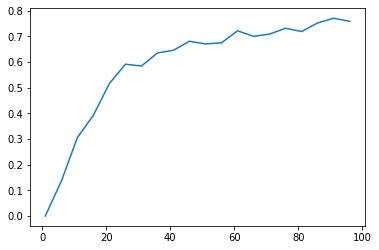

In [ ]:
plt.plot(list(dimensions), list(np.array(min_distances) / np.array(avg_distances)))

In low-dimensional data sets, the closest points tend to be much closer than average.
But two points are close only if they’re close in every dimension, and every extra
dimension—even if just noise—is another opportunity for each point to be further
away from every other point. When you have a lot of dimensions, it’s likely that the
closest points aren’t much closer than average, which means that two points being
close doesn’t mean very much (unless there’s a lot of structure in your data that makes
it behave as if it were much lower-dimensional).

A different way of thinking about the problem involves the sparsity of higher dimensional spaces.

If you pick 50 random numbers between 0 and 1, you’ll probably get a pretty good
sample of the unit interval:

![](https://i.imgur.com/c1tJvpd.png)

If you pick 50 random points in the unit square, you’ll get less coverage:

![](https://i.imgur.com/uMPJTHx.png)

And in three dimensions less still:

![](https://i.imgur.com/jgjT5al.png)

So if you’re trying to use nearest neighbors in higher dimensions, it’s probably a good
idea to do some kind of dimensionality reduction first.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

```
y = []
for n in range(1000):
    y.append(0.99**n)
```

In [ ]:
y = []
for n in range(100):
    y.append(0.90**n)

```
plt.plot(np.arange(1000), y)
```

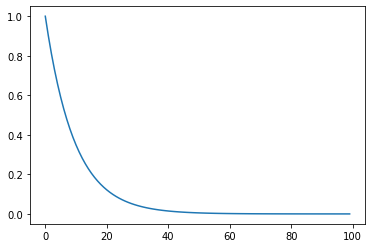

In [ ]:
plt.plot(np.arange(100), y)